---
<a name='title'></a>
# **<font color="Navy"> Seminario: Modelación Climática Tropical </font>**
## **<font color="RoyalBlue"> 1er semestre </font>**
### **<font color="DodgerBlue"> Notebook 2: Anomalías (ahora sí) pero diarias </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2025-I

---

### <font color="ForestGreen"> 1. Importancia de Desestacionalizar los Datos </font>

El ciclo estacional es una de las mayores fuentes de variabilidad en las variables climáticas, dominando las señales en series temporales. Este ciclo refleja cambios periódicos en la energía solar incidente y sus efectos en la atmósfera y los océanos. Sin embargo, cuando buscamos identificar patrones asociados con eventos específicos, como olas de frío o calor, ciclones tropicales, o cambios diarios en invierno, es fundamental remover esta señal dominante para evitar sesgos en el análisis.

Por ejemplo, si realizamos compuestos de temperatura en días con eventos de frío extremo durante el invierno y seleccionamos preferentemente datos de febrero, el ciclo anual podría introducir una señal artificial, ya que febrero típicamente es más frío que diciembre en muchas regiones. Este efecto puede distorsionar nuestras conclusiones y sobrestimar o subestimar la magnitud de las anomalías.

¿Qué significa desestacionalizar? Desestacionalizar los datos implica remover el ciclo anual (u otro ciclo periódico relevante) para aislar las variaciones más sutiles o asociadas a fenómenos específicos. Esto se logra calculando anomalías respecto a una climatología diaria o mensual.

En este notebook, exploraremos la importancia de desestacionalizar los datos antes de realizar análisis estadísticos y compuestos. Aplicaremos métodos para:

    Calcular el ciclo anual climatológico.
    Remover el ciclo anual de los datos.
    Generar anomalías desestacionalizadas.
    Realizar análisis de compuestos utilizando los datos desestacionalizados.

Veamos cómo desestacionalizar los datos y por qué es crucial para un análisis climatológico robusto.

In [2]:
pip install xarray

  Using cached xarray-2024.11.0-py3-none-any.whl.metadata (11 kB)
Using cached xarray-2024.11.0-py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install cartopy

  Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.9 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install h5netcdf 

  Using cached h5netcdf-1.4.1-py3-none-any.whl.metadata (13 kB)
  Using cached h5py-3.12.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
Using cached h5netcdf-1.4.1-py3-none-any.whl (50 kB)
Using cached h5py-3.12.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install netcdf4

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [6]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# abrimos los datos
da=xr.open_dataarray('pr_HadGEM_amip_sliced.nc')

FileNotFoundError: [Errno 2] No such file or directory: '/home/jovyan/JET/pr_HadGEM_amip_sliced.nc'

In [3]:
da=da*86400

In [4]:
# Calcular la climatología diaria: promedio para cada día del año
climatologia_diaria = da.groupby('time.dayofyear').mean('time')

In [5]:
# Aplicar un rolling mean a la climatología diaria
# 'min_periods=1' asegura que no queden huecos al comienzo y fin de la serie
climatologia_diaria_suavizada = climatologia_diaria.rolling(dayofyear=7, center=True, min_periods=1).mean()

Descripción de los pasos:

- Agrupación por dayofyear: Agrupa los datos según el día del año para calcular el promedio de cada día a lo largo de todos los años.
- Aplicación del rolling mean: Usa una ventana de 7 días centrada para suavizar los datos, asegurando que cada punto tenga un promedio suavizado sin dejar huecos al inicio o al final de la serie.
- Asegurar continuidad con min_periods=1: Esto evita que se produzcan valores nulos en las primeras y últimas posiciones del rolling mean.

Para ejemplificar cómo se ve esto, puede ser útil primero visualizar lo que esto hace sobre una serie de tiempo. Por ejemplo consideremos una región en el centro de México. 

In [6]:
# Definir la caja de interés: Centro de México (aproximado)
lat_min, lat_max = 15, 22  # Latitudes entre 19°N y 24°N
lon_min, lon_max = 258, 265  # Longitudes entre 260°E y 265°E (0-360 formato)

# Seleccionar los datos en la región definida
region = da.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

In [7]:
# Calcular la climatología diaria en la región
climatologia_diaria_mex = region.groupby('time.dayofyear').mean(['time', 'lat', 'lon'])

# Aplicar un rolling mean a la climatología diaria
climatologia_diaria_suavizada_mex = climatologia_diaria_mex.rolling(dayofyear=12, center=True, min_periods=1).mean()


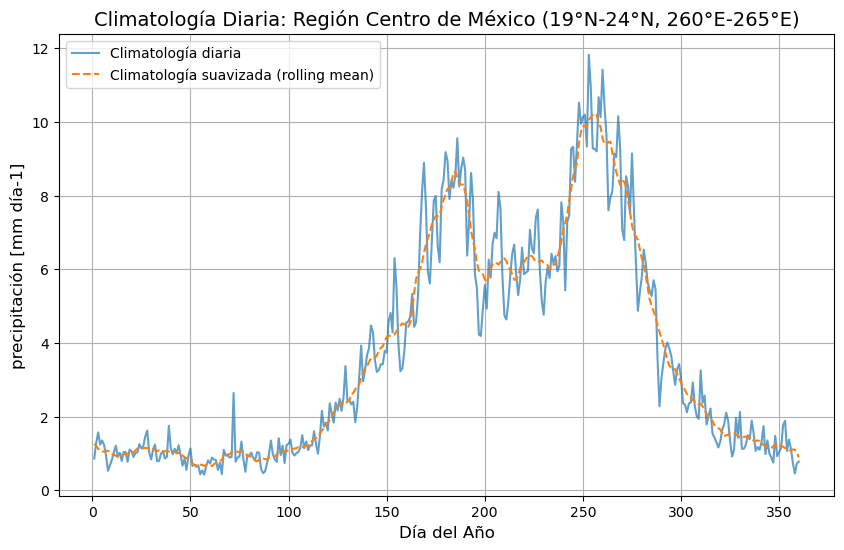

In [8]:
# Graficar la climatología diaria y la suavizada
plt.figure(figsize=(10, 6))
plt.plot(climatologia_diaria_mex['dayofyear'], climatologia_diaria_mex, label='Climatología diaria', alpha=0.7)
plt.plot(climatologia_diaria_suavizada_mex['dayofyear'], climatologia_diaria_suavizada_mex, label='Climatología suavizada (rolling mean)', linestyle='--')
plt.title(f"Climatología Diaria: Región Centro de México (19°N-24°N, 260°E-265°E)", fontsize=14)
plt.xlabel("Día del Año", fontsize=12)
plt.ylabel("precipitación [mm día-1]", fontsize=12)
plt.legend()
plt.grid()

Para remover el ciclo anual de todos los datos, debes restar la climatología diaria suavizada a los datos originales. Esto implica calcular las anomalías desestacionalizadas. 

In [9]:
# Recalcular la climatología diaria suavizada si es necesario
climatologia_diaria_mex = region.groupby('time.dayofyear').mean(['time'])
climatologia_diaria_suavizada_mex = climatologia_diaria_mex.rolling(dayofyear=12, center=True, min_periods=1).mean()
# Expandir la climatología suavizada a las dimensiones originales (broadcasting)
# Esto asegura que las dimensiones de climatología diaria coincidan con los datos originales
climatologia_expandida = climatologia_diaria_suavizada_mex.sel(dayofyear=region['time.dayofyear'])

# Calcular las anomalías desestacionalizadas (restar el ciclo anual)
anomalias = region - climatologia_expandida

In [10]:
# Seleccionar un subconjunto de datos para graficar (por ejemplo, una región o un rango de tiempo)
# Aquí promediamos espacialmente sobre la región
anomalias_promedio = anomalias.mean(['lat', 'lon']).values

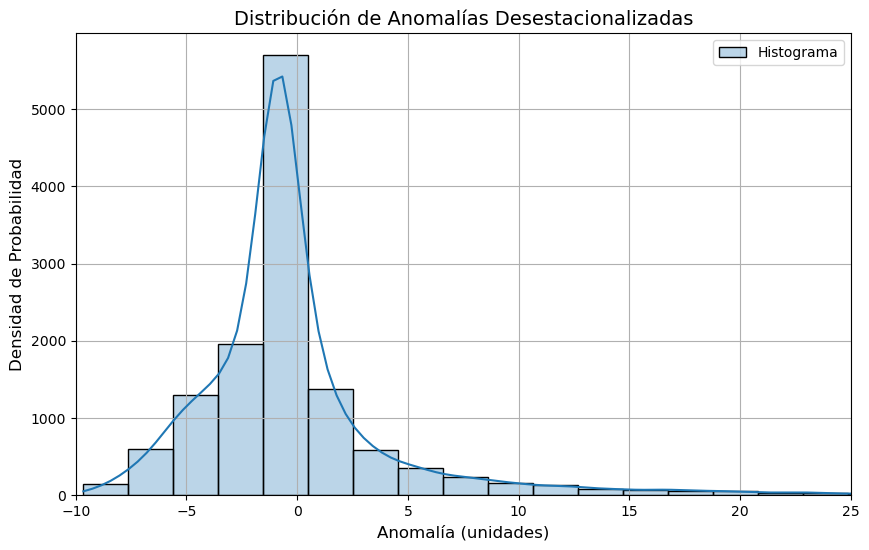

In [11]:
# Crear la gráfica de densidad de probabilidad
plt.figure(figsize=(10, 6))
sns.histplot(anomalias_promedio, bins=40, kde=True, color="tab:blue", alpha=0.3, label="Histograma")
plt.title("Distribución de Anomalías Desestacionalizadas", fontsize=14)
plt.xlabel("Anomalía (unidades)", fontsize=12)
plt.xlim([-10,25])
plt.ylabel("Densidad de Probabilidad", fontsize=12)
plt.legend()
plt.grid()

La distribución de las anomalías desestacionalizadas nos permite entender las características estadísticas de los datos climáticos después de remover el ciclo anual. Algunos puntos clave para destacar:

- Forma de la distribución: Las distribuciones centradas en 0 indican que el proceso de desestacionalización fue efectivo.
- Dispersión: La amplitud de la distribución muestra la variabilidad climática en la región seleccionada.
- Asimetría y colas: Estas características pueden revelar eventos extremos (como olas de frío o calor) y ayudan a identificar posibles sesgos o errores en los datos.

Volvamos a la receta original. 
1. Calcular climatología diaria
2. Suavizar la climatología diaria. 
3. Añadir dimensión de dayofyear al análisis. 
4. Calcular la anomalía como la diferencia entre los datos completos y la climatología. 
5. Generar un compuesto basado en un índice. 

In [12]:
# Calcular la climatología diaria a partir de los datos originales
climatologia_diaria = da.groupby('time.dayofyear').mean('time')

# Suavizar la climatología diaria
climatologia_diaria_suavizada = climatologia_diaria.rolling(dayofyear=12, center=True, min_periods=1).mean()

# Expandir la climatología suavizada a las dimensiones originales (broadcasting)
climatologia_expandida = climatologia_diaria_suavizada.sel(dayofyear=da['time.dayofyear'])

# Calcular las anomalías desestacionalizadas
anomalias = da - climatologia_expandida

# Seleccionar 30 fechas aleatorias
fechas_random = np.random.choice(anomalias['time'], size=30, replace=False)

# Crear un compuesto de anomalías basado en las 30 fechas seleccionadas
compuesto_random = anomalias.sel(time=fechas_random).mean(dim='time')


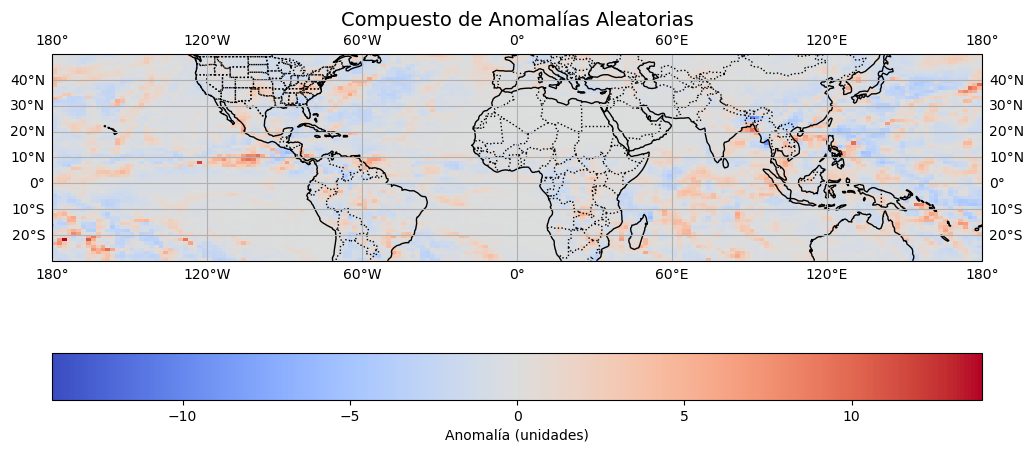

In [13]:
# Graficar el compuesto aleatorio
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
compuesto_random.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'orientation':'horizontal','label': 'Anomalía (unidades)'})
ax.set_title("Compuesto de Anomalías Aleatorias", fontsize=14)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

### ¿Por qué obtenemos anomalías pequeñas con compuestos aleatorios?

Cuando seleccionamos fechas al azar, las anomalías positivas y negativas tienen aproximadamente la misma probabilidad de ser elegidas. Al promediar estas anomalías, las señales se cancelan, resultando en un compuesto que tiene valores muy cercanos a cero.
### ¿Qué sucede cuando las fechas no son al azar?

Si el compuesto se realiza con fechas asociadas a un índice climático o evento específico, como El Niño, La Niña, una contingencia de frío o una ola de calor, las fechas tienen una coherencia física. Estas condiciones introducen patrones consistentes en las anomalías, como temperaturas más altas durante El Niño o temperaturas más bajas en eventos de frío, lo que resulta en un compuesto con señales claras y significativas.